# Data Cleaning

In [5]:
import pandas as pd

DATA_PATH = "../data/raw/dropout.csv"

df = pd.read_csv(DATA_PATH, sep=";")

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()

Shape: (4424, 37)

Columns:
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate',

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print(df.columns.tolist())

['marital_status', 'application_mode', 'application_order', 'course', 'daytime/evening_attendance', 'previous_qualification', 'previous_qualification_(grade)', 'nacionality', "mother's_qualification", "father's_qualification", "mother's_occupation", "father's_occupation", 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_(credited)', 'curricular_units_1st_sem_(enrolled)', 'curricular_units_1st_sem_(evaluations)', 'curricular_units_1st_sem_(approved)', 'curricular_units_1st_sem_(grade)', 'curricular_units_1st_sem_(without_evaluations)', 'curricular_units_2nd_sem_(credited)', 'curricular_units_2nd_sem_(enrolled)', 'curricular_units_2nd_sem_(evaluations)', 'curricular_units_2nd_sem_(approved)', 'curricular_units_2nd_sem_(grade)', 'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_rate', 'inflation_rate', 'gdp', 'target']


In [7]:
TARGET_COL = "target"
print(df[TARGET_COL].value_counts(dropna=False))
print(df[TARGET_COL].value_counts(normalize=True) * 100)

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


In [8]:
CATEGORICAL_COLS = [
    "marital_status",
    "application_mode",
    "application_order",
    "course",
    "daytime_evening_attendance",
    "previous_qualification",
    "nacionality",
    "mother's_qualification".replace("'", ""),
    "father's_qualification".replace("'", ""),
    "mother's_occupation".replace("'", ""),
    "father's_occupation".replace("'", ""),
    "displaced",
    "educational_special_needs",
    "debtor",
    "tuition_fees_up_to_date",
    "gender",
    "scholarship_holder",
    "international",
]

NUMERIC_COLS = [
    "previous_qualification_(grade)",
    "admission_grade",
    "age_at_enrollment",

    "curricular_units_1st_sem_(credited)",
    "curricular_units_1st_sem_(enrolled)",
    "curricular_units_1st_sem_(evaluations)",
    "curricular_units_1st_sem_(approved)",
    "curricular_units_1st_sem_(grade)",
    "curricular_units_1st_sem_(without_evaluations)",

    "curricular_units_2nd_sem_(credited)",
    "curricular_units_2nd_sem_(enrolled)",
    "curricular_units_2nd_sem_(evaluations)",
    "curricular_units_2nd_sem_(approved)",
    "curricular_units_2nd_sem_(grade)",
    "curricular_units_2nd_sem_(without_evaluations)",

    "unemployment_rate",
    "inflation_rate",
    "gdp",
]

In [10]:
missing_cat = [c for c in CATEGORICAL_COLS if c not in df.columns]
missing_num = [c for c in NUMERIC_COLS if c not in df.columns]

print("Missing categorical columns:", missing_cat)
print("Missing numeric columns:", missing_num)

Missing categorical columns: ['daytime_evening_attendance', 'mothers_qualification', 'fathers_qualification', 'mothers_occupation', 'fathers_occupation']
Missing numeric columns: []


In [11]:
for c in missing_cat + missing_num:
    print("\nLooking for something like:", c)
    print([col for col in df.columns if c.split("_")[0] in col])


Looking for something like: daytime_evening_attendance
['daytime/evening_attendance']

Looking for something like: mothers_qualification
[]

Looking for something like: fathers_qualification
[]

Looking for something like: mothers_occupation
[]

Looking for something like: fathers_occupation
[]


In [12]:
target_mapping = {
    "dropout": "Dropout",
    "enrolled": "Enrolled",
    "graduate": "Graduate",
    0: "Dropout",
    1: "Enrolled",
    2: "Graduate",
}

df[TARGET_COL] = df[TARGET_COL].apply(lambda x: target_mapping.get(str(x).strip().lower(), x))
print(df[TARGET_COL].value_counts())

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [13]:
df["target"].value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [14]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("'", "")
    .str.replace("(", "")
    .str.replace(")", "")
)

df.columns.tolist()

['marital_status',
 'application_mode',
 'application_order',
 'course',
 'daytime_evening_attendance',
 'previous_qualification',
 'previous_qualification_grade',
 'nacionality',
 'mothers_qualification',
 'fathers_qualification',
 'mothers_occupation',
 'fathers_occupation',
 'admission_grade',
 'displaced',
 'educational_special_needs',
 'debtor',
 'tuition_fees_up_to_date',
 'gender',
 'scholarship_holder',
 'age_at_enrollment',
 'international',
 'curricular_units_1st_sem_credited',
 'curricular_units_1st_sem_enrolled',
 'curricular_units_1st_sem_evaluations',
 'curricular_units_1st_sem_approved',
 'curricular_units_1st_sem_grade',
 'curricular_units_1st_sem_without_evaluations',
 'curricular_units_2nd_sem_credited',
 'curricular_units_2nd_sem_enrolled',
 'curricular_units_2nd_sem_evaluations',
 'curricular_units_2nd_sem_approved',
 'curricular_units_2nd_sem_grade',
 'curricular_units_2nd_sem_without_evaluations',
 'unemployment_rate',
 'inflation_rate',
 'gdp',
 'target']

In [15]:
# Target
TARGET_COL = "target"

# Categorical columns
CATEGORICAL_COLS = [
    "marital_status",
    "application_mode",
    "application_order",
    "course",
    "daytime_evening_attendance",
    "previous_qualification",
    "nacionality",
    "mothers_qualification",
    "fathers_qualification",
    "mothers_occupation",
    "fathers_occupation",
    "displaced",
    "educational_special_needs",
    "debtor",
    "tuition_fees_up_to_date",
    "gender",
    "scholarship_holder",
    "international",
]

# Numeric columns
NUMERIC_COLS = [
    "previous_qualification_grade",
    "admission_grade",
    "age_at_enrollment",

    "curricular_units_1st_sem_credited",
    "curricular_units_1st_sem_enrolled",
    "curricular_units_1st_sem_evaluations",
    "curricular_units_1st_sem_approved",
    "curricular_units_1st_sem_grade",
    "curricular_units_1st_sem_without_evaluations",

    "curricular_units_2nd_sem_credited",
    "curricular_units_2nd_sem_enrolled",
    "curricular_units_2nd_sem_evaluations",
    "curricular_units_2nd_sem_approved",
    "curricular_units_2nd_sem_grade",
    "curricular_units_2nd_sem_without_evaluations",

    "unemployment_rate",
    "inflation_rate",
    "gdp",
]

set(CATEGORICAL_COLS).issubset(df.columns), set(NUMERIC_COLS).issubset(df.columns)

(True, True)

In [16]:
df.head()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Preprocessing

### Imports

In [3]:
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import joblib

# Paths
RAW_PATH = "../data/raw/dropout.csv"
PROCESSED_DIR = "../data/processed"
ARTIFACT_DIR = "../models/preprocessing"

os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(ARTIFACT_DIR, exist_ok=True)

### Loading Dataset

In [4]:
try:
    df = pd.read_csv(RAW_PATH)
    if df.shape[1] == 1 and ";" in df.columns[0]:
        df = pd.read_csv(RAW_PATH, sep=";")
except Exception:
    df = pd.read_csv(RAW_PATH, sep=";")

print("Shape:", df.shape)
print(df.columns.tolist())
df.head()

Shape: (4424, 37)
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Ta

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


/var/folders/s7/d_q1bm6104zbspwrktl3_hl00000gn/T/ipykernel_14886/443861421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Target", palette="Set2")


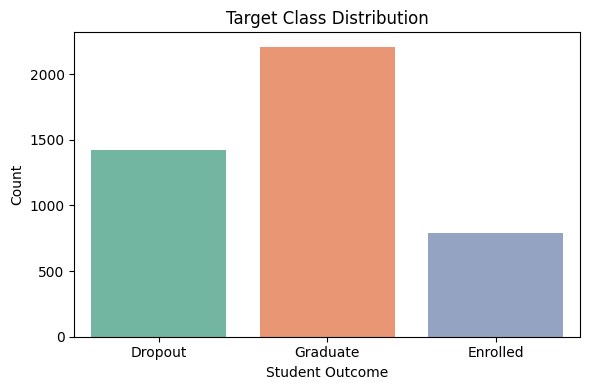

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Target", palette="Set2")
plt.title("Target Class Distribution")
plt.xlabel("Student Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Normalizing Columns

In [19]:
df.columns = (
    df.columns
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("'", "")
    .str.replace("(", "")
    .str.replace(")", "")
)

print(df.columns.tolist())

['marital_status', 'application_mode', 'application_order', 'course', 'daytime_evening_attendance', 'previous_qualification', 'previous_qualification_grade', 'nacionality', 'mothers_qualification', 'fathers_qualification', 'mothers_occupation', 'fathers_occupation', 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited', 'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade', 'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited', 'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations', 'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate', 'inflation_rate', 'gdp', 'target']


### Defining target and feature groups

In [20]:
TARGET_COL = "target"

CATEGORICAL_COLS = [
    "marital_status",
    "application_mode",
    "application_order",
    "course",
    "daytime_evening_attendance",
    "previous_qualification",
    "nacionality",
    "mothers_qualification",
    "fathers_qualification",
    "mothers_occupation",
    "fathers_occupation",
    "displaced",
    "educational_special_needs",
    "debtor",
    "tuition_fees_up_to_date",
    "gender",
    "scholarship_holder",
    "international",
]

NUMERIC_COLS = [
    "previous_qualification_grade",
    "admission_grade",
    "age_at_enrollment",

    "curricular_units_1st_sem_credited",
    "curricular_units_1st_sem_enrolled",
    "curricular_units_1st_sem_evaluations",
    "curricular_units_1st_sem_approved",
    "curricular_units_1st_sem_grade",
    "curricular_units_1st_sem_without_evaluations",

    "curricular_units_2nd_sem_credited",
    "curricular_units_2nd_sem_enrolled",
    "curricular_units_2nd_sem_evaluations",
    "curricular_units_2nd_sem_approved",
    "curricular_units_2nd_sem_grade",
    "curricular_units_2nd_sem_without_evaluations",

    "unemployment_rate",
    "inflation_rate",
    "gdp",
]

missing_cat = [c for c in CATEGORICAL_COLS if c not in df.columns]
missing_num = [c for c in NUMERIC_COLS if c not in df.columns]
print("Missing categorical:", missing_cat)
print("Missing numeric:", missing_num)

assert TARGET_COL in df.columns, f"Target column '{TARGET_COL}' not found!"
assert not missing_cat, f"Fix missing categorical columns: {missing_cat}"
assert not missing_num, f"Fix missing numeric columns: {missing_num}"

Missing categorical: []
Missing numeric: []


### Target standardization

In [21]:
# Standardize to: Dropout, Enrolled, Graduate
mapping = {
    "dropout": "Dropout",
    "enrolled": "Enrolled",
    "graduate": "Graduate",
    0: "Dropout",
    1: "Enrolled",
    2: "Graduate",
}

df[TARGET_COL] = df[TARGET_COL].apply(lambda x: mapping.get(str(x).strip().lower(), x))

print(df[TARGET_COL].value_counts())
print((df[TARGET_COL].value_counts(normalize=True) * 100).round(2))

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
target
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: proportion, dtype: float64


### Fit preprocessing artifacts

In [22]:
X = df[CATEGORICAL_COLS + NUMERIC_COLS].copy()
y = df[TARGET_COL].copy()

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Encoder for categoricals 
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
encoder.fit(X_train[CATEGORICAL_COLS])

# Scaler for numerics 
scaler = StandardScaler()
scaler.fit(X_train[NUMERIC_COLS])

print("Fitted encoder + scaler on TRAIN only.")

Fitted encoder + scaler on TRAIN only.


### Transform and save processed dataset

In [23]:
X_cat_encoded = encoder.transform(X[CATEGORICAL_COLS])
X_num_scaled = scaler.transform(X[NUMERIC_COLS])

encoded_cat_cols = [f"cat__{c}" for c in CATEGORICAL_COLS]
scaled_num_cols = [f"num__{c}" for c in NUMERIC_COLS]

df_processed = pd.DataFrame(X_cat_encoded, columns=encoded_cat_cols)
df_processed[scaled_num_cols] = X_num_scaled
df_processed[TARGET_COL] = y.values

print("Processed shape:", df_processed.shape)
df_processed.head()

Processed shape: (4424, 37)


,cat__marital_status,cat__application_mode,cat__application_order,cat__course,cat__daytime_evening_attendance,cat__previous_qualification,cat__nacionality,cat__mothers_qualification,cat__fathers_qualification,cat__mothers_occupation,...,num__curricular_units_2nd_sem_credited,num__curricular_units_2nd_sem_enrolled,num__curricular_units_2nd_sem_evaluations,num__curricular_units_2nd_sem_approved,num__curricular_units_2nd_sem_grade,num__curricular_units_2nd_sem_without_evaluations,num__unemployment_rate,num__inflation_rate,num__gdp,target
0,0.0,7.0,5.0,1.0,1.0,0.0,0.0,12.0,9.0,5.0,...,-0.283125,-2.789390,-2.020998,-1.459446,-1.935403,-0.19651,-0.293597,0.138366,0.764363,Dropout
1,0.0,5.0,1.0,10.0,1.0,0.0,0.0,0.0,2.0,3.0,...,-0.283125,-0.090515,-0.508120,0.525811,0.662937,-0.19651,0.872143,-1.093655,0.345457,Graduate
2,0.0,0.0,5.0,4.0,1.0,0.0,0.0,20.0,24.0,9.0,...,-0.283125,-0.090515,-2.020998,-1.459446,-1.935403,-0.19651,-0.293597,0.138366,0.764363,Dropout
3,0.0,7.0,2.0,14.0,1.0,0.0,0.0,21.0,24.0,5.0,...,-0.283125,-0.090515,0.500465,0.194935,0.422115,-0.19651,-0.820060,-1.456014,-1.378674,Graduate
4,1.0,11.0,1.0,2.0,0.0,0.0,0.0,20.0,25.0,9.0,...,-0.283125,-0.090515,-0.508120,0.525811,0.536189,-0.19651,0.872143,-1.093655,0.345457,Graduate


In [24]:
processed_csv_path = os.path.join(PROCESSED_DIR, "processed.csv")
df_processed.to_csv(processed_csv_path, index=False)
print("Saved:", processed_csv_path)

Saved: ../data/processed/processed.csv


In [25]:
encoder_path = os.path.join(ARTIFACT_DIR, "encoder.joblib")
scaler_path = os.path.join(ARTIFACT_DIR, "scaler.joblib")
schema_path = os.path.join(ARTIFACT_DIR, "feature_schema.json")

joblib.dump(encoder, encoder_path)
joblib.dump(scaler, scaler_path)

schema = {
    "target_col": TARGET_COL,
    "categorical_cols_raw": CATEGORICAL_COLS,
    "numeric_cols_raw": NUMERIC_COLS,
    "categorical_cols_processed": encoded_cat_cols,
    "numeric_cols_processed": scaled_num_cols,
    "processed_csv": "data/processed/processed.csv",
    "notes": "Encoder and scaler were fit on a stratified train split to avoid data leakage."
}

with open(schema_path, "w") as f:
    json.dump(schema, f, indent=2)

print("Saved:", encoder_path)
print("Saved:", scaler_path)
print("Saved:", schema_path)

Saved: ../models/preprocessing/encoder.joblib
Saved: ../models/preprocessing/scaler.joblib
Saved: ../models/preprocessing/feature_schema.json


# Splits
### Imports

In [26]:
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split

PROCESSED_CSV = "../data/processed/processed.csv"
SPLITS_DIR = "../data/splits"
os.makedirs(SPLITS_DIR, exist_ok=True)

SEED = 42
TARGET_COL = "target"

### Load processed dataset

In [27]:
dfp = pd.read_csv(PROCESSED_CSV)

print("Processed shape:", dfp.shape)
print("Columns:", dfp.columns[:10].tolist(), "...")
print("\nTarget distribution (%):")
print((dfp[TARGET_COL].value_counts(normalize=True) * 100).round(2))

dfp.head()

Processed shape: (4424, 37)
Columns: ['cat__marital_status', 'cat__application_mode', 'cat__application_order', 'cat__course', 'cat__daytime_evening_attendance', 'cat__previous_qualification', 'cat__nacionality', 'cat__mothers_qualification', 'cat__fathers_qualification', 'cat__mothers_occupation'] ...

Target distribution (%):
target
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: proportion, dtype: float64


,cat__marital_status,cat__application_mode,cat__application_order,cat__course,cat__daytime_evening_attendance,cat__previous_qualification,cat__nacionality,cat__mothers_qualification,cat__fathers_qualification,cat__mothers_occupation,...,num__curricular_units_2nd_sem_credited,num__curricular_units_2nd_sem_enrolled,num__curricular_units_2nd_sem_evaluations,num__curricular_units_2nd_sem_approved,num__curricular_units_2nd_sem_grade,num__curricular_units_2nd_sem_without_evaluations,num__unemployment_rate,num__inflation_rate,num__gdp,target
0,0.0,7.0,5.0,1.0,1.0,0.0,0.0,12.0,9.0,5.0,...,-0.283125,-2.789390,-2.020998,-1.459446,-1.935403,-0.19651,-0.293597,0.138366,0.764363,Dropout
1,0.0,5.0,1.0,10.0,1.0,0.0,0.0,0.0,2.0,3.0,...,-0.283125,-0.090515,-0.508120,0.525811,0.662937,-0.19651,0.872143,-1.093655,0.345457,Graduate
2,0.0,0.0,5.0,4.0,1.0,0.0,0.0,20.0,24.0,9.0,...,-0.283125,-0.090515,-2.020998,-1.459446,-1.935403,-0.19651,-0.293597,0.138366,0.764363,Dropout
3,0.0,7.0,2.0,14.0,1.0,0.0,0.0,21.0,24.0,5.0,...,-0.283125,-0.090515,0.500465,0.194935,0.422115,-0.19651,-0.820060,-1.456014,-1.378674,Graduate
4,1.0,11.0,1.0,2.0,0.0,0.0,0.0,20.0,25.0,9.0,...,-0.283125,-0.090515,-0.508120,0.525811,0.536189,-0.19651,0.872143,-1.093655,0.345457,Graduate


### Stratified Splits (70/15/15)

In [28]:
train_df, temp_df = train_test_split(
    dfp,
    test_size=0.30,
    random_state=SEED,
    stratify=dfp[TARGET_COL],
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,
    random_state=SEED,
    stratify=temp_df[TARGET_COL],
)

print("Train:", train_df.shape)
print("Val  :", val_df.shape)
print("Test :", test_df.shape)

Train: (3096, 37)
Val  : (664, 37)
Test : (664, 37)


### Save Splits

In [29]:
train_path = os.path.join(SPLITS_DIR, "train.csv")
val_path = os.path.join(SPLITS_DIR, "val.csv")
test_path = os.path.join(SPLITS_DIR, "test.csv")

train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)

print("Saved:", train_path)
print("Saved:", val_path)
print("Saved:", test_path)

Saved: ../data/splits/train.csv
Saved: ../data/splits/val.csv
Saved: ../data/splits/test.csv


## Split Summary

In [30]:
def split_stats(df, name):
    vc = df[TARGET_COL].value_counts()
    pct = (df[TARGET_COL].value_counts(normalize=True) * 100).round(2)
    return {
        "name": name,
        "rows": int(df.shape[0]),
        "class_counts": vc.to_dict(),
        "class_percent": pct.to_dict(),
    }

summary = {
    "seed": SEED,
    "ratios": {"train": 0.70, "val": 0.15, "test": 0.15},
    "train": split_stats(train_df, "train"),
    "val": split_stats(val_df, "val"),
    "test": split_stats(test_df, "test"),
}

summary_path = os.path.join(SPLITS_DIR, "splits_summary.json")
with open(summary_path, "w") as f:
    json.dump(summary, f, indent=2)

print("Saved:", summary_path)
summary

Saved: ../data/splits/splits_summary.json


{'seed': 42,
 'ratios': {'train': 0.7, 'val': 0.15, 'test': 0.15},
 'train': {'name': 'train',
  'rows': 3096,
  'class_counts': {'Graduate': 1546, 'Dropout': 994, 'Enrolled': 556},
  'class_percent': {'Graduate': 49.94, 'Dropout': 32.11, 'Enrolled': 17.96}},
 'val': {'name': 'val',
  'rows': 664,
  'class_counts': {'Graduate': 332, 'Dropout': 213, 'Enrolled': 119},
  'class_percent': {'Graduate': 50.0, 'Dropout': 32.08, 'Enrolled': 17.92}},
 'test': {'name': 'test',
  'rows': 664,
  'class_counts': {'Graduate': 331, 'Dropout': 214, 'Enrolled': 119},
  'class_percent': {'Graduate': 49.85, 'Dropout': 32.23, 'Enrolled': 17.92}}}